# TUTORIAL: from artist lyrics to artist classification

It obtains all lyrics for a given set of artists (parses HTML from www.metrolyrics.com) and returns a comparision of the words used by the artists.
Packages required: requests | re | time |

In [1]:
import sys
sys.path.insert(0, '../src')
from lyricsFunctions import * 

## 1. Fetch lyrics for a set of artists from the web

In [2]:
listOfArtists = ['Eddie Vedder', 'Dire Straits', 'Ed Sheeran']
songs4Artists = getSongs4Artists(listOfArtists) #by default (location = 'online')

Fetching eddie-vedder songs online ...
http://www.metrolyrics.com/eddie-vedder-lyrics.html
Fetching dire-straits songs online ...
http://www.metrolyrics.com/dire-straits-lyrics.html
Fetching ed-sheeran songs online ...
http://www.metrolyrics.com/ed-sheeran-lyrics.html
Done!


#### Check songs found for artist

In [ ]:
#songs4Artists['eddie-vedder'] # Check artist songs found

#### Fetch song lyrics for each artist

In [3]:
lyrics4Artists = getLyrics4Artists(songs4Artists, numSongs = 20) # by default (numSongs = 5 | location = 'online')

Fetching 20 lyrics for eddie-vedder ...
Fetching 20 lyrics for dire-straits ...
Fetching 20 lyrics for ed-sheeran ...
Done!


## 2. Word extraction from each artist lyrics

In [42]:
#X, cv, vec, tf, labels, lyrics = tokenLyrics4Artists(lyrics4Artists, method='countVectorize')
def tokenLyrics4Artists(lyrics4Artists, method='countVectorize'):
    #print(lyrics4Artists)
    words4artists = dict()
    labels = []
    lyrics = []
    for artist in lyrics4Artists.keys():
        for song in lyrics4Artists[artist]:
            labels.append(artist)
            lyrics.append(song)

    if method == 'spacy':
        import spacy
        try:
            # Load English tokenizer, tagger, parser, NER and word vectors
            nlp = spacy.load('en_core_web_sm')
        except:
            import os
            os.system("python -m spacy download en_core_web_lg")
            nlp = spacy.load('en_core_web_sm')

        doc = nlp(lyrics)

    elif method == 'countVectorize':
        # tokenize + count words + Tfid normalization
        from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
        cv = CountVectorizer(stop_words='english', min_df = 10 )
        # get all words used by all artists
        vec = cv.fit_transform(lyrics)

        tf = TfidfTransformer()
        X = tf.fit_transform(vec) # normalise the vec data
        return X, cv, vec, tf, labels, lyrics

print(labels)
#lyrics4Artists
#tokenLyrics4Artists(lyrics4Artists, method='countVectorize')

['eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'eddie-vedder', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'dire-straits', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran', 'ed-sheeran']


In [33]:
words4artists = dict()

dict_keys([])


## 3. Use lyrics to classify each artist:

#### Which world is characteristic of each artist (bag of words)?

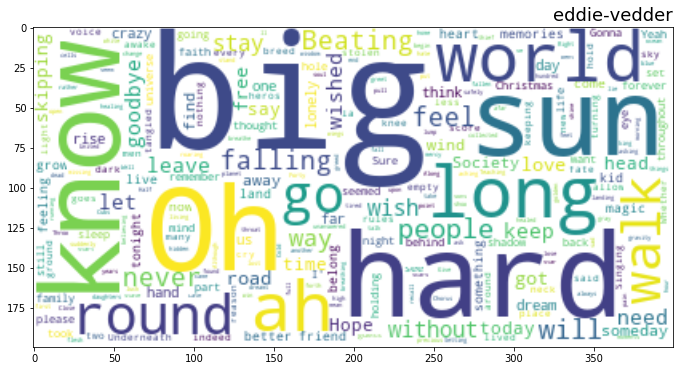

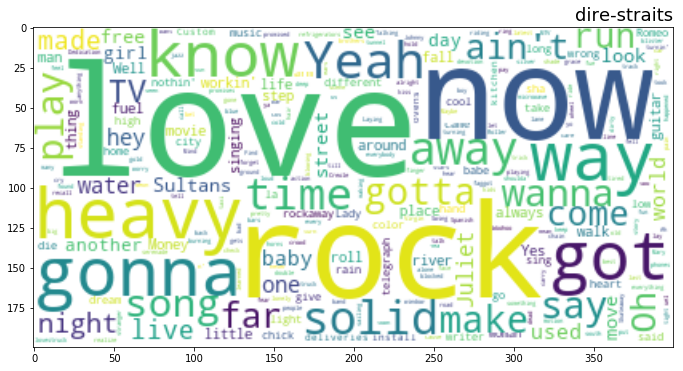

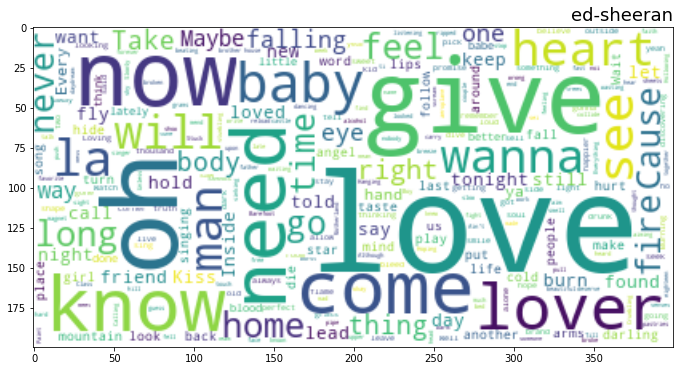

In [43]:
wordcloud4Artist(lyrics4Artists, 'eddie-vedder')
wordcloud4Artist(lyrics4Artists, 'dire-straits')
wordcloud4Artist(lyrics4Artists, 'ed-sheeran')
# TODO: 3 clouds side by side
# TODO: Check the existance of repeated tokens

#### Determine to which artist each given verse most probably belongs to using a Naive Bayes Model.

In [17]:
m = buildNaiveBayesModel(X, labels)

ValueError: Found input variables with inconsistent numbers of samples: [60, 0]

In [18]:
test_songs = [
      "I played the blues on twelve bars down on Lover's Lane",
      "I'll keep on healing all the scars That we've collected from the start",
      "So, baby, now Take me into your loving arms",
      "with a little help from my crocodile",
      "oh sweet love, what is this",
      "the beautiful people"]

In [ ]:
prediction, classProb, logProb = proba_Lyrics4Artists(test_songs, m, cv, tf)

## Vocabulary that better charaterize the difference between artists

In [7]:
#### Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
wordVectors4Artists = list(sorted(cv.vocabulary_.keys()))

lda = LatentDirichletAllocation(n_components=10)
lda.fit(vec)
c = lda.components_

ctrans = c.T

df = pd.DataFrame(ctrans, index=wordVectors4Artists)

for i in range(10):
    print(df[i].sort_values(ascending=False).head(20))

long     50.945670
ve       38.807398
ll       34.184642
feel     27.318372
home     23.472280
love     23.458728
eyes      8.453016
say       8.049627
got       6.272487
day       6.091002
time      5.785939
mind      4.959814
hold      4.681112
fall      2.896683
just      2.740285
gonna     2.471873
baby      2.452996
right     2.449005
heart     2.200613
don       1.556771
Name: 0, dtype: float64
love       201.042672
oh          68.342544
like        29.734138
ll          29.106665
hold        12.517486
tonight     10.504199
time         9.677331
want         9.069345
know         8.908251
play         8.523687
cause        7.916156
just         7.620620
eyes         6.073027
ve           5.506115
let          4.692162
heart        3.666892
mind         2.807225
feel         2.574176
yeah         2.307688
place        1.388253
Name: 1, dtype: float64
free       13.443788
day         5.669921
love        3.228424
need        2.996980
singing     2.100033
heart       1.414815
ll    

In [8]:
### Principal components 

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

wordVectors4Artists = list(sorted(cv.vocabulary_.keys()))

pca = PCA(n_components=3)
logProb_T = np.transpose(logProb)
c = pca.fit_transform(logProb_T)
df = pd.DataFrame(c, index=wordVectors4Artists)
#print(df)
varianceDf = pd.DataFrame(pca.explained_variance_ratio_, index = ['variance_ratio PC-1','variance_ratio PC-2','variance_ratio PC-3'])
print(varianceDf)

for i in range(3):
    print("\n Principal component " + str(i + 1) + " holds "+ str(varianceDf.iloc[i,0]) + " of the variation \n")
    print(df[i].sort_values(ascending=False).head(20))


                            0
variance_ratio PC-1  0.392267
variance_ratio PC-2  0.311976
variance_ratio PC-3  0.295756

 Principal component 1 holds 0.3922672152301272 of the variation 

ll         0.937231
oh         0.871612
love       0.836068
know       0.787409
ve         0.633399
long       0.490924
need       0.428399
feel       0.406060
tonight    0.264659
like       0.235196
way        0.181211
eyes       0.161904
heart      0.161559
don        0.134586
let        0.094435
just       0.073936
free       0.050328
come       0.044471
time       0.018920
home      -0.019395
Name: 0, dtype: float64

 Principal component 2 holds 0.3119763314169067 of the variation 

love     0.981261
baby     0.721516
don      0.714739
home     0.564103
just     0.410880
come     0.326905
look     0.326494
night    0.305940
man      0.300805
oh       0.292593
cause    0.256917
right    0.241394
eyes     0.193917
time     0.145803
make     0.121843
old      0.091453
play     0.081566
like     0.069

# Obtain world similarity per artist
### Deep Learning using Word Embeddings

### 1. Gensim models:

In [9]:
analysis_gensimModels(lyrics4Artists['eddie-vedder'], 'love', 'right', 'wrong')


Distance between: 
love and right 0.45444077
love and wrong 0.045271084

Difference between right and wrong: 40.92%


In [10]:
analysis_gensimModels(lyrics4Artists['dire-straits'], 'love', 'right', 'wrong')


Distance between: 
love and right 0.7841379
love and wrong 0.048672397

Difference between right and wrong: 73.55%


In [11]:
analysis_gensimModels(lyrics4Artists['ed-sheeran'], 'love', 'right', 'wrong')


Distance between: 
love and right 0.9902267
love and wrong 0.95285326

Difference between right and wrong: 3.74%


# Pretrained GenSim Vectors
###### This is a 4 GB file that will be loaded to memory. It will require a lot of RAM.

In [12]:
import os
from keras.utils import get_file
import gensim
import subprocess

MODEL = 'GoogleNews-vectors-negative300.bin'
path = get_file(MODEL + '.gz', 'https://s3.amazonaws.com/dl4j-distribution/%s.gz' % MODEL)
if not os.path.isdir('generated'):
    os.mkdir('generated')

unzipped = os.path.join('generated', MODEL)
if not os.path.isfile(unzipped):
    with open(unzipped, 'wb') as fout:
        zcat = subprocess.Popen(['zcat'],
                          stdin=open(path),
                          stdout=fout
                         )
        zcat.wait()

model = gensim.models.KeyedVectors.load_word2vec_format(unzipped, binary=True)

Using TensorFlow backend.


In [13]:
import sys
a = sys.path.insert(0, '../../../rawData')
print(a)

None


In [14]:
'''This script loads pre-trained word embeddings (GloVe embeddings)
into a frozen Keras Embedding layer, and uses it to
train a text classification model on the 20 Newsgroup dataset
(classification of newsgroup messages into 20 different categories).

GloVe embedding data can be found at:
http://nlp.stanford.edu/data/glove.6B.zip
(source page: http://nlp.stanford.edu/projects/glove/)

20 Newsgroup data can be found at:
http://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-20/www/data/news20.html

CODE FROM:
https://github.com/keras-team/keras/blob/master/examples/pretrained_word_embeddings.py
'''

import os
import sys
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model


BASE_DIR = '/Users/Magalangelo/Dropbox/_dataScienceRepos/portfolioDataScience/rawData'
GLOVE_DIR = os.path.join(BASE_DIR, 'glove.6B')
TEXT_DATA_DIR = os.path.join(BASE_DIR, '20_newsgroup')
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2

# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open(os.path.join(GLOVE_DIR, f'glove.6B.{EMBEDDING_DIM}d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')

texts = []  # list of text samples
labels_index = {}  # dictionary mapping label name to numeric id
labels = []  # list of label ids
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    path = os.path.join(TEXT_DATA_DIR, name)
    if os.path.isdir(path):
        label_id = len(labels_index)
        labels_index[name] = label_id
        for fname in sorted(os.listdir(path)):
            if fname.isdigit():
                fpath = os.path.join(path, fname)
                args = {} if sys.version_info < (3,) else {'encoding': 'latin-1'}
                with open(fpath, **args) as f:
                    t = f.read()
                    i = t.find('\n\n')  # skip header
                    if 0 < i:
                        t = t[i:]
                    texts.append(t)
                labels.append(label_id)

print('Found %s texts.' % len(texts))

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print('Training model.')

# train a 1D convnet with global maxpooling
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(len(labels_index), activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
validation_data=(x_val, y_val))


names = [x[1] for x in sorted([(b, a) for a, b in labels_index.items()])]

def pred(s):
    s1 = tokenizer.texts_to_sequences([s])
    d1 = pad_sequences(s1, maxlen=MAX_SEQUENCE_LENGTH)
    lab = model.predict(d1)
    for nam, score in zip(names, lab[0]):
        if score > 0.1:
            print(f"{nam:25}\t{score:6.2f}")


pred("god is a spaghetti monster floating in space")

Indexing word vectors.
Found 400000 word vectors.
Processing text dataset


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Magalangelo/Dropbox/_dataScienceRepos/portfolioDataScience/rawData/20_newsgroup'